## **Business Understanding**

SyriaTel, a telecommunications company, wants to reduce customer churn that is customers leaving the service.
Churn is costly as acquiring new customers is more expensive than retaining existing ones. By predicting which customers are likely to churn, SyriaTel can proactively intervene with retention strategies such as discounts, improved service.

Stakeholders Include: SyriaTel’s management, marketing team, and customer service department.

Value Proposition: To Reduce churn will improve revenue, customer lifetime value, and brand loyalty.



## **Problem Statement**

SyriaTel faces a problem where customers are discontinuing their services, leading to revenue loss.
The task is to develop a predictive model that identifies customers likely to churn based on the below:

*   usage patterns
*   plan details
*   customer service interactions.





.




## **Objectives**

Below are the objectives:

1. To build a binary classification model to predict customer churn.
2. To identify key factors driving churn to inform retention strategies.
3. To achieve high model performance (e.g., accuracy, precision, recall) to ensure actionable predictions.
4. To provide recommendations to SyriaTel based on insights.

## **Data Understanding**

In [2]:
import pandas as pd
import numpy as np

# Load customer churn dataset
df = pd.read_csv("Customer_Churn.csv")

# Basic data understanding
print(df.head())
print(df.info())
print(df.describe())

  state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...           

The Customer churn dataset has 21 variables with 3333 observations.

Our Target Variable is Churn, indicated as either True or False.

From the above statistics, the below can be observed:

- Account Length:
The average account length is about 101 days.
Account lengths range from 1 to 243 days.
The distribution is fairly symmetrical around the mean.

- Area Code:
There are three area codes represented: 408, 415, and 510.
This column likely represents the geographical location of the customer.

- Number voice mail messages:
The average number of voicemail messages is 8.
Many customers (over 50%) don't have any voicemail messages.
The maximum number of voicemail messages is 51.

- Total day minutes:
Customers average about 180 minutes of day calls.
There's a fair amount of variability in day call duration (std = 54.47).
Some customers have very low (0 minutes) while others have very high (350.8 minutes) day call usage.

- Total day calls:
Customers average about 100 day calls.
The number of day calls ranges from 0 to 165.

- Total day charge:
The average charge is $30.56.
The charges range from $0 to $59.64.

- Total eve minutes, Total eve calls, Total eve charge:
These attributes provide similar insights into evening call activity.
For example, average evening minutes are around 201, and the average charge is $17.08.

- Total night minutes, Total night calls, Total night charge:
These attributes provide similar insights into night call activity.
For example, average night minutes are around 201, and the average charge is $9.04.

- Total intl minutes, Total intl calls, Total intl charge:
These relate to international call activity.
On average, customers have about 10.24 minutes of international calls.
A significant number of customers (at least 25%) do not make international calls.

- Customer service calls:
The average number of customer service calls is 1.56.
The majority of customers make 2 or fewer customer service calls.
Some customers make a high number of customer service calls (up to 9).

## **Data Cleaning**

### Correct Formats

In [4]:
# Converting Churn to 0 and 1
# Converting Categorical columns to strings
df['churn'] = df['churn'].map({False: 0, True: 1})
df['international plan'] = df['international plan'].astype(str)
df['voice mail plan'] = df['voice mail plan'].astype(str)

### Handling NAs

In [5]:
print(df.isnull().sum())

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64


We do not have any missing values

### Handling Duplicates

In [6]:
# Checking for duplicates
df.duplicated().sum()

0

We do not have duplicates

### Other cleaning steps

In [7]:
# Checking for uniqueness in phone number and dropping it
df.drop('phone number', axis=1, inplace=True)

Phone number dropped as it is not relevant in our analysis.

### Feature Engineering

In [8]:
# Creating Total Minutes feature
# Creating Total Charge feature
# Creating Call per Minute Ratio

df['total minutes'] = df[['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']].sum(axis=1)
df['total charge'] = df[['total day charge', 'total eve charge', 'total night charge', 'total intl charge']].sum(axis=1)
df['calls per minute'] = (df[['total day calls', 'total eve calls', 'total night calls', 'total intl calls']].sum(axis=1)) / df['total minutes']

1) **Total minutes** = total day minutes + total eve minutes + total night minutes + total intl minutes.

2) **Total charge feature** = sum of all charges.

3) **Calls per minute ratio** = (total day calls + total eve calls + total night calls + total intl calls) / total minutes.



## **Explanatory Data Analysis**

### Univariate Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

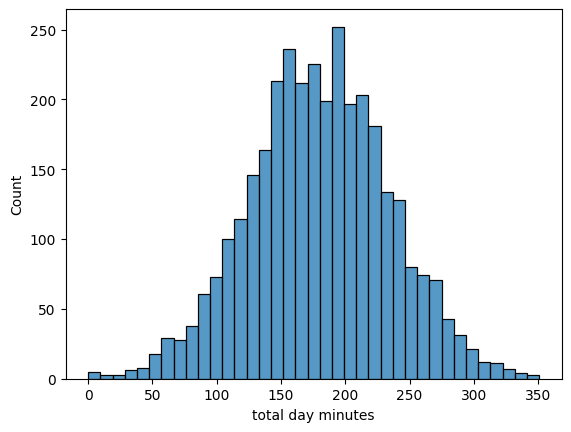

In [10]:
sns.histplot(df['total day minutes'])
plt.show()

The above histogram shows the distribution of the 'total day minutes'

- The peak of the histogram is around 180-200 minutes. This indicates that the most common range for total day minutes is between 180 and 200 minutes.
- There's a slight right skew, meaning the tail on the right side is longer. This suggests that there are a few customers with unusually high "total day minutes."
- Most customers use between 100 and 250 minutes of call time during the day.

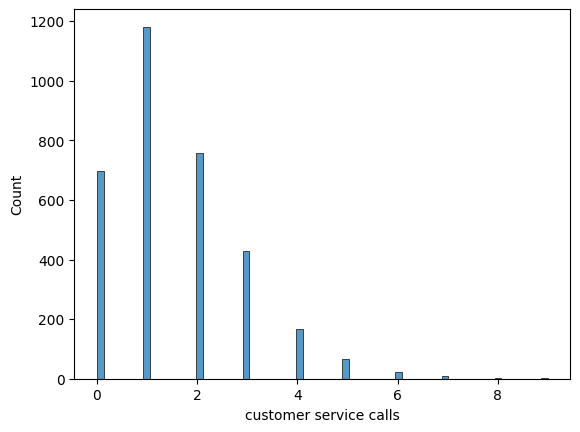

In [11]:
sns.histplot(df['customer service calls'])
plt.show()

The above histogram shows the distribution of the 'customer service calls'

- The highest bar is at 1 customer service call, indicating that the most common number of customer service calls is 1.
- There's a clear decreasing trend as the number of customer service calls increases. The bars get progressively shorter, showing that fewer customers make 2, 3, 4, and so on, customer service calls.
- Most customers require minimal assistance, with many not contacting customer service at all.

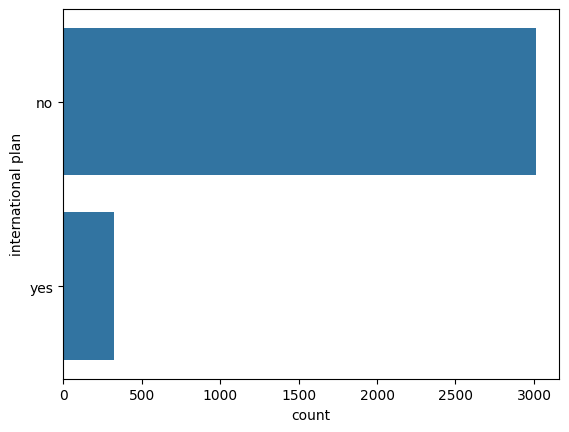

In [12]:
sns.countplot(df['international plan'])
plt.show()

The above is a horizontal bar chart visualizing the count of customers who either have or do not have an "international plan"

- A large majority of customers (3000 and above) do not subscribe to the international plan.
- A relatively small number of customers (around 300-400) have opted for the international plan.

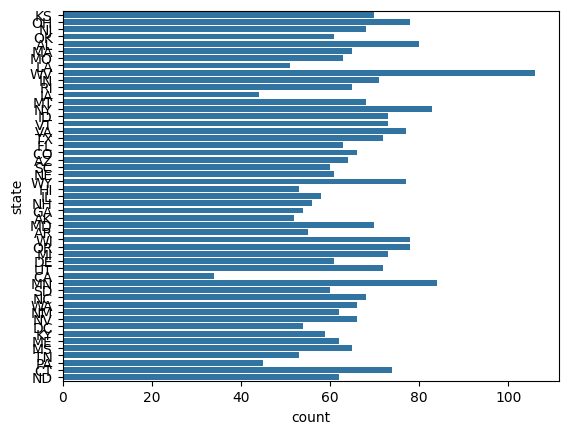

In [13]:
sns.countplot(df['state'])
plt.show()

The chart above is a horizontal bar chart showing the distribution of the "state" variable,representing the number of customers or observations per state.

- States like WV (West Virginia), MN (Minnesota), and WY (Wyoming) appear to have relatively high counts.
- States like KS (Kansas), DC (District of Columbia), and IA (Iowa) appear to have relatively low counts.

### Bivariate Analysis

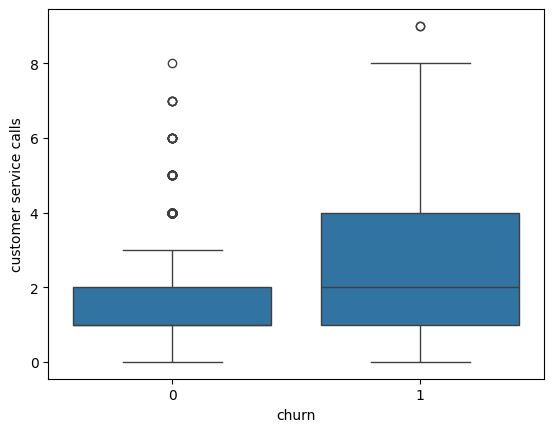

churn                  0    1
international plan           
no                  2664  346
yes                  186  137


In [16]:
sns.boxplot(x='churn', y='customer service calls', data=df)
plt.show()
print(pd.crosstab(df['international plan'], df['churn']))

The presence of outliers suggests that there are some customers with unusually high customer service call activity, particularly within the churned group.

### Multivariate Analysis

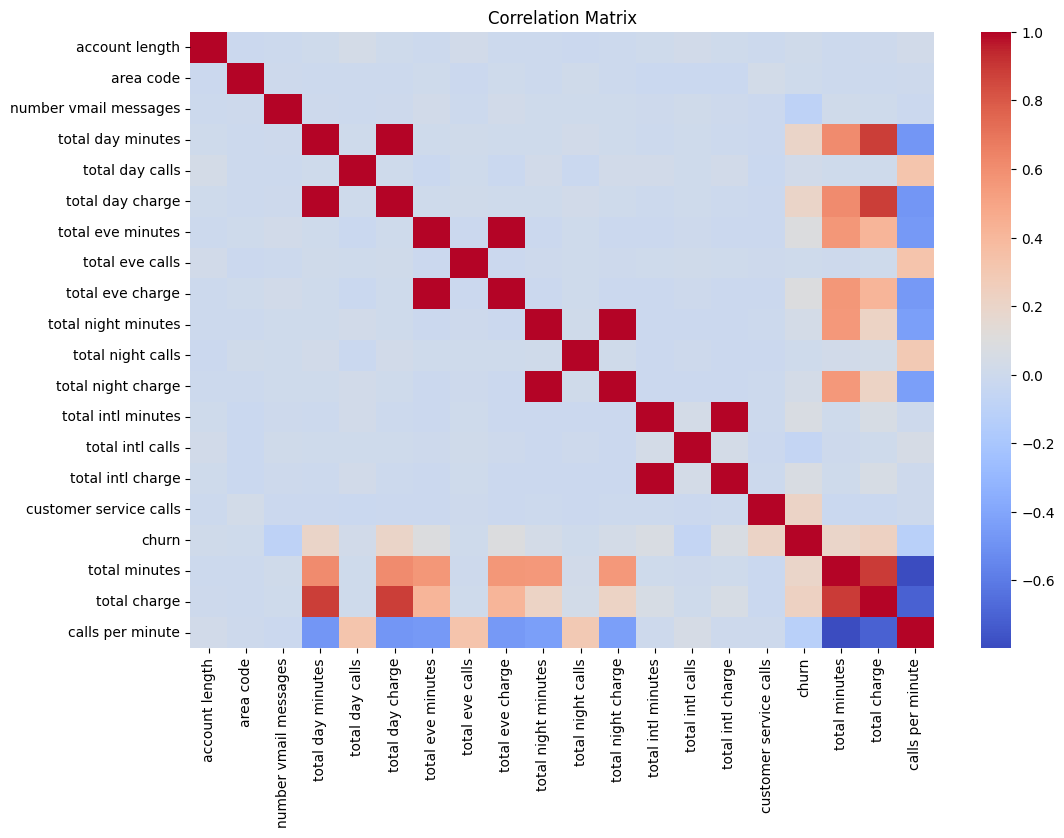

In [25]:
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

- Call Charges: As expected, call charges are directly proportional to the number of minutes used for each time period (day, evening, night, international).
- Churn Risk: A higher number of customer service calls is associated with a higher likelihood of customer churn, which is a significant finding.
- Call Efficiency: The "calls per minute" metric is negatively correlated with call duration, which is a logical inverse relationship.

## **Preprocessing**

In [26]:
from sklearn.preprocessing import StandardScaler

### Encoding

In [27]:
# One hot encoding 'State' and 'Area Code'
df = pd.get_dummies(df, columns=['state', 'area code'], drop_first=True)
df['international plan'] = df['international plan'].map({'no': 0, 'yes': 1})
df['voice mail plan'] = df['voice mail plan'].map({'no': 0, 'yes': 1})

### Scaling

In [30]:
# Standardize numerical features
scaler = StandardScaler()
numerical_cols = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

## **Modeling**

### Classification

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

X = df.drop('churn', axis=1)
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Logistic Regression

In [35]:
models = {
    'Logistic Regression': LogisticRegression(),

}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} Accuracy: {model.score(X_test, y_test)}")

Logistic Regression Accuracy: 0.8455772113943029


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Random Forest

In [36]:
models = {

    'Random Forest': RandomForestClassifier(),

}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} Accuracy: {model.score(X_test, y_test)}")

Random Forest Accuracy: 0.9655172413793104


#### K-NN Model

In [37]:
models = {

    'K-NN': KNeighborsClassifier(),

}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} Accuracy: {model.score(X_test, y_test)}")

K-NN Accuracy: 0.8710644677661169


#### SVM

In [38]:
models = {

    'SVM': SVC(),

}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} Accuracy: {model.score(X_test, y_test)}")

SVM Accuracy: 0.848575712143928


#### Naive Bayes

In [39]:
models = {

    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} Accuracy: {model.score(X_test, y_test)}")

Naive Bayes Accuracy: 0.5892053973013494


### Hyperparameter Tuning

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 20, 'n_estimators': 200}


The model is set to have 200 trees, each of which can grow to a maximum depth of 20.

### Model Evaluation

In [41]:
from sklearn.metrics import classification_report, roc_auc_score

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))
print(f"ROC-AUC: {roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])}")

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       566
           1       1.00      0.78      0.88       101

    accuracy                           0.97       667
   macro avg       0.98      0.89      0.93       667
weighted avg       0.97      0.97      0.97       667

ROC-AUC: 0.9325997970821817


- The model performs well overall, as indicated by the high accuracy and ROC-AUC score.
- The model performs better on the majority class (0) than the minority class (1). This is a common issue in imbalanced datasets.


### Conclusion and Recommendation

- Focus retention efforts on customers with high service calls or international plans.

- Offer incentives to at-risk customers.

- Monitor usage patterns (e.g., low minutes might signal disengagement).

